<a href="https://colab.research.google.com/github/AadityaAdh/Malaria_Detection/blob/main/Malaria_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds
#tyo malarial ko img file download na garni
#siddai tensorflow lae yo module bata access garna dinxa

In [ ]:
dataset,dataset_info=tfds.load('malaria',with_info=True)

In [ ]:
dataset_info

tfds.core.DatasetInfo(
    name='malaria',
    full_name='malaria/1.0.0',
    description="""
    The Malaria dataset contains a total of 27,558 cell images with equal instances
    of parasitized and uninfected cells from the thin blood smear slide images of
    segmented cells.
    """,
    homepage='https://lhncbc.nlm.nih.gov/publication/pub9932',
    data_dir='/root/tensorflow_datasets/malaria/1.0.0',
    file_format=tfrecord,
    download_size=337.08 MiB,
    dataset_size=317.62 MiB,
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=2),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_examples=27558, num_shards=4>,
    },
    citation="""@article{rajaraman2018pre,
      title={Pre-trained convolutional neural networks as feature extractors toward
      improved malaria parasite detection in thin blood smear im

In [ ]:


# Creating a dataset with 2 elements
#maybe this is representation
dataset1 = tf.data.Dataset.from_tensor_slices({
    'sample1': {'image': [1,1,1], 'label': [1,0,0]},
    'sample2': {'image': [2,2,2], 'label': [0,0,0]}
})

In [ ]:
dataset.keys()

dict_keys(['train'])

In [ ]:
d1=dataset['train']


In [ ]:
type(d1)

tensorflow.python.data.ops.prefetch_op._PrefetchDataset

In [ ]:
d1

<_PrefetchDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

In [ ]:
len(d1)

27558

In [ ]:
#so use for loop for iterating whatever with many elements
for element in d1.take(1):
  print(element)

{'image': <tf.Tensor: shape=(103, 103, 3), dtype=uint8, numpy=
array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)>, 'label': <tf.Tensor: shape=(), dtype=int64, numpy=1>}


In [ ]:
#image ko value ra label ko value dictionary ko form ma raixa
#tyo tensorflow ko data type vitra
for element in d1.take(1):
  print(type(element))

<class 'dict'>


#so data structure here is
    dictionary with keys
    --tensordataset
    ------dictionary with keys images and labels
so this is alredy dataset with x(images) values and y values(labels)

In [ ]:
for element in d1.take(1):
  print(element.keys())

dict_keys(['image', 'label'])


In [ ]:
for element in d1.take(1):
  print(element['image'])

tf.Tensor(
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]], shape=(103, 103, 3), dtype=uint8)


#shape=(103, 103, 3)

In the context of image data in TensorFlow, the convention is typically (height, width, channels).

So, for a tensor representing an image in TensorFlow:

The first dimension is the height of the image.
The second dimension is the width of the image.
The third dimension is the number of channels (e.g., color channels).
Therefore, the shape (103, 103, 3) indicates an image with a height of 103 pixels, a width of 103 pixels, and 3 color channels, where each channel corresponds to the Red, Green, and Blue components in that order.

If you were dealing with a different convention, such as the channel-first convention used in some other frameworks, the shape might be represented as (3, 103, 103). However, TensorFlow, by default, uses the channel-last convention.

#now lets do splitting

In [ ]:
train_ratio=0.6
val_ratio=0.2
test_ratio=0.2

In [ ]:
lendataset=len(dataset['train'])
lendataset

27558

In [ ]:
train_start=0
train_end=int(lendataset*0.6)
train_end

16534

In [ ]:
valid_start=train_end
valid_end=train_end+int(lendataset*0.2)
valid_end

22045

In [ ]:
test_start=valid_end
#last ko exclusive huni vaye ra +1 garya ho
# or as last doesnt include so +1
#indexing garda last ko value exclusive hunxa so +1
test_end=lendataset+1
test_end

27559

In [ ]:
def splitt(dataset,train_ratio,val_ratio,test_ratio):
  lendataset=len(dataset)
  train_start=0
  train_end=int(lendataset*0.6)
  valid_start=train_end
  valid_end=train_end+int(lendataset*0.2)
  test_start=valid_end
  test_end=lendataset+1
  train_dataset=dataset[train_start,train_end]
  valid_dataset=dataset[valid_start,valid_end]
  test_dataset=dataset[test_start,test_end]
  return train_dataset,valid_dataset,test_dataset




In [ ]:
dataset2=dataset['train']

In [ ]:
train_dataset,valid_dataset,test_dataset=splitt(dataset2,0.6,0.2,0.2)

TypeError: '_PrefetchDataset' object is not subscriptable

#so dataset haru ma indexing grna mildo raina raixa

so use dataset.take(n) elements in dataset
and use skipping method


#skipping method
dataset.skip(n) creates a new dataset that skips the first n elements of the original dataset. You can then iterate through or perform other operations on the modified dataset.

In [ ]:
k=tf.data.Dataset.range(1,50)
n = 10
skipped_dataset = k.skip(n)


# Now, you can iterate through or perform operations on the modified dataset
for element in skipped_dataset:
    # Process each element as needed
    print(element)
#so 11 bata print vako xa 10 oota skip hanae ra

tf.Tensor(11, shape=(), dtype=int64)
tf.Tensor(12, shape=(), dtype=int64)
tf.Tensor(13, shape=(), dtype=int64)
tf.Tensor(14, shape=(), dtype=int64)
tf.Tensor(15, shape=(), dtype=int64)
tf.Tensor(16, shape=(), dtype=int64)
tf.Tensor(17, shape=(), dtype=int64)
tf.Tensor(18, shape=(), dtype=int64)
tf.Tensor(19, shape=(), dtype=int64)
tf.Tensor(20, shape=(), dtype=int64)
tf.Tensor(21, shape=(), dtype=int64)
tf.Tensor(22, shape=(), dtype=int64)
tf.Tensor(23, shape=(), dtype=int64)
tf.Tensor(24, shape=(), dtype=int64)
tf.Tensor(25, shape=(), dtype=int64)
tf.Tensor(26, shape=(), dtype=int64)
tf.Tensor(27, shape=(), dtype=int64)
tf.Tensor(28, shape=(), dtype=int64)
tf.Tensor(29, shape=(), dtype=int64)
tf.Tensor(30, shape=(), dtype=int64)
tf.Tensor(31, shape=(), dtype=int64)
tf.Tensor(32, shape=(), dtype=int64)
tf.Tensor(33, shape=(), dtype=int64)
tf.Tensor(34, shape=(), dtype=int64)
tf.Tensor(35, shape=(), dtype=int64)
tf.Tensor(36, shape=(), dtype=int64)
tf.Tensor(37, shape=(), dtype=int64)
t

In [ ]:
def split(dataset,train_ratio,val_ratio,test_ratio):
  length_train=int(len(dataset)*train_ratio)
  train_dataset=dataset.take(length_train)
  skipped_for_valid_dataset=dataset.skip(length_train)
  valid_dataset=skipped_for_valid_dataset.take(int(len(dataset)*val_ratio))
  skipped_for_test_dataset=dataset.skip(length_train+int(len(dataset)*val_ratio))
  test_dataset=skipped_for_test_dataset.take(int(len(dataset)*test_ratio))
  return train_dataset,valid_dataset,test_dataset

In [ ]:
dataset3=dataset['train']
train_dataset,valid_dataset,test_dataset=split(dataset3,0.6,0.2,0.2)

In [ ]:
x=len(train_dataset)
x

16534

In [ ]:
y=len(valid_dataset)
y

5511

In [ ]:
z=len(test_dataset)
z

5511

In [ ]:
x+y+z

27556

In [ ]:
#3 ta miss vako xa
#aaba tellai xodhdim
#so upto now form given dataset we have created 3 dataset from given dataset
#6:56

#image visualization
using subplot lets plot say 8 images and their labels

TypeError: Image data of dtype <U5 cannot be converted to float

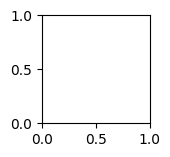

In [ ]:
for i,(image,label) in enumerate(train_dataset.take(8)):
  plt.subplot(2,4,i+1)
  plt.imshow(image)
  #plt.title(label)


In [ ]:
type(train_dataset.take(1))

tensorflow.python.data.ops.take_op._TakeDataset

In [ ]:
for element in train_dataset.take(1):
  print(type(element))

<class 'dict'>


In [ ]:
for element in train_dataset.take(1):
  print(element.keys())

dict_keys(['image', 'label'])


In [ ]:
for element in train_dataset.take(1):
  print(type(element['image']))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
for element in train_dataset.take(1):
  print(type(element['image'].numpy()))

<class 'numpy.ndarray'>


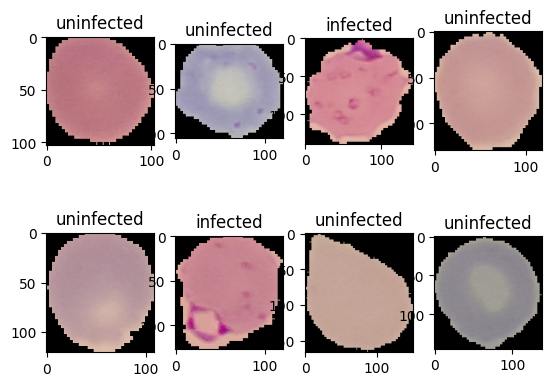

In [ ]:
for i,element in enumerate(train_dataset.take(8)):
  plt.subplot(2,4,i+1)
  plt.imshow(element['image'])
  #python does support ternary operator but not like c
  #l=element['label']==0?"uninfected":"infected"
  l = "uninfected" if element['label'] == 1 else "infected"
  plt.title(l)
  #plt.title(label)

#pre-processsing

we going to do

1.resizing our image

as hamro image ko size yeutai xaina sabbai ko

2.Normalization

look in my git hub standarization vs normalization
7:00:00

#1.Resizing
tf.image.resize


Resize images to size using the specified method.


    tf.image.resize(
        images,
        size,
        method=ResizeMethod.BILINEAR,
        preserve_aspect_ratio=False,
        antialias=False,
        name=None
    )
  



In [ ]:
img_size=224
#so creating image of size 224,224
def my_resizing_function(dictionary):
  return tf.image.resize(dictionary['image'],(img_size,img_size))/255,dictionary['label']
  #note here image is normalized as well


In [ ]:
type(train_dataset)

tensorflow.python.data.ops.take_op._TakeDataset

#data set ko element access garna man lagae .take(1) gare ra gare ni vayo

#or .map(your function garda ni vayo)

#uses tyo .take(1) wala value haru herna ko lagi data type herna ko lagi use garnu

#.map chai value change garnu paryo vanae
as it sends element wise to functions

then stacks the return value of the function for different element values

In [ ]:
for element in train_dataset.take(1):
  print(type(element))

<class 'dict'>


In [ ]:
#we have our data in train_dataset
train_dataset=train_dataset.map(my_resizing_function)
type(train_dataset)

tensorflow.python.data.ops.map_op._MapDataset

In [ ]:
for element in train_dataset.take(1):
  print(type(element))


<class 'tuple'>


#note:it has returned tuple
tuple vanya chai

    mytuple=(1, 'Hello', 3.14)
    print(mytuple)
    #yedi yeuta index ko print garauni vayae
    print(mytuple[1])
    #so simply array ko  jastai indexing garni

  

In [ ]:
for element in train_dataset.take(1):
  print(type(element[0]))

<class 'tensorflow.python.framework.ops.EagerTensor'>


In [ ]:
for element in train_dataset.take(1):
  print(element[0])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 ...

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]
  ...
  [0. 0. 0.]
  [0. 0. 0.]
  [0. 0. 0.]]], shape=(224, 224, 3), dtype=float32)


In [ ]:
#so there it is the resized image of 224,224
for element in train_dataset.take(1):
  #printing label
  print(element[1])

tf.Tensor(1, shape=(), dtype=int64)


In [ ]:
train_dataset=train_dataset.shuffle(
    buffer_size=8, reshuffle_each_iteration=True,name=None
).batch(32).prefetch(tf.data.AUTOTUNE)

#implementation of cnns


In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense,InputLayer

In [ ]:
model=tf.keras.Sequential([
    InputLayer(input_shape=(img_size,img_size,3)),
    Conv2D(filters=6,kernel_size=5,strides=1,padding="valid",activation="relu"),
    MaxPool2D(pool_size=2,strides=2),
    Conv2D(filters=16,kernel_size=5,strides=1,padding="valid",activation="relu"),
    MaxPool2D(pool_size=2,strides=2),
    Flatten(),
    Dense(1000,activation="relu"),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

#note:1 hot encoding garya xaina so output yeuta nide matrai either 0 or 1
#if one hot encoding garya vayae chai 2 oota nai last ma node rakhnu parthyo

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 220, 220, 6)       456       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 16)      2416      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 16)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 44944)             0         
                                                                 
 dense (Dense)               (None, 1000)              4

#binary cross entropy loss

In [ ]:
y_true=[1]
y_pred=[0.1]
bce=tf.keras.losses.BinaryCrossentropy()
bce(y_true,y_pred)


<tf.Tensor: shape=(), dtype=float32, numpy=2.3025842>

In [ ]:
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics=RootMeanSquaredError())


In [ ]:
type(valid_dataset)

tensorflow.python.data.ops.take_op._TakeDataset

In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs=100,verbose=1)

Epoch 1/100
 25/517 [>.............................] - ETA: 27s - loss: 15800.8779 - root_mean_squared_error: 0.5753

KeyboardInterrupt: 

1 epoch aauni bttikai error aai ra xa
meaning hamro train data bata propagation ta vayo
tara validation data ma kei gadbadi xa

In [ ]:
train_dataset

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [ ]:
valid_dataset

<_TakeDataset element_spec={'image': TensorSpec(shape=(None, None, 3), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>

so we can clearly see shape ma farak xa
hamlae resize ta gare kai xaina valid dataset lai ta

#reshizing the valid_daataset

In [ ]:
valid_dataset=valid_dataset.map(my_resizing_function)

In [ ]:
valid_dataset

<_MapDataset element_spec=(TensorSpec(shape=(224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

also send through pipeline

In [ ]:
valid_dataset=valid_dataset.shuffle(
    buffer_size=8, reshuffle_each_iteration=True,name=None
).batch(32).prefetch(tf.data.AUTOTUNE)

# resize  for test dataset for now and we only need to do shuffle and batching for test dataset

prefetch yeuta chai garnu pardina

In [ ]:
test_dataset=test_dataset.map(my_resizing_function)


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs=100,verbose=1)

In [ ]:
# we dont see decresase in loss so we introduce batch hormalization in between the layers as
from tensorflow.keras.layers import BatchNormalization
model=tf.keras.Sequential([
    InputLayer(input_shape=(img_size,img_size,3)),
    Conv2D(filters=6,kernel_size=5,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Conv2D(filters=16,kernel_size=5,strides=1,padding="valid",activation="relu"),
    BatchNormalization(),
    MaxPool2D(pool_size=2,strides=2),

    Flatten(),

    Dense(1000,activation="relu"),
    BatchNormalization(),

    Dense(100,activation="relu"),
    BatchNormalization(),

    Dense(1,activation="sigmoid")
])
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=BinaryCrossentropy(),
              metrics=RootMeanSquaredError())

#loss vs metrics
loss vanya loss nai vayo
metric vanya loss bhayek aaru ni hunxa ni model lai examine garna ko lagi like accuracy,f1 score etc (loss pani parxa parna ta)

In the context of training a machine learning model, both loss and metrics are used to evaluate the model's performance, but they serve slightly different purposes.

Loss:
The loss (or objective) is a single scalar value that represents how well the model is performing on a given batch of training data.
The goal during training is to minimize the loss. Lower loss values indicate better agreement between the model's predictions and the actual target values.
The loss function is chosen based on the type of task (e.g., mean squared error for regression, categorical crossentropy for classification).


Metrics:
Metrics are additional quantities used to evaluate the performance of a model but are not used for optimizing the model during training.
While the loss function guides the optimization process, metrics provide additional insights into different aspects of model performance.
Common metrics include accuracy, precision, recall, F1 score, and others, depending on the type of problem.
Metrics are useful for understanding how well the model generalizes to data that it has not seen during training.
In TensorFlow's model.compile() function, you can specify both a loss function and a list of metrics. For example:


    model.compile(optimizer='adam',
                  loss='mean_squared_error',
                    # Loss function for training
                  metrics=['accuracy', 'mae'])
                    # Additional metrics for evaluation
In this example, the model is trained to minimize the mean squared error loss, but during training and evaluation, metrics such as accuracy and mean absolute error (mae) are computed and reported. These metrics provide additional information about the model's performance beyond the loss. Keep in mind that the choice of metrics depends on the specific goals and characteristics of your machine learning task.

#accuracy :

    Accuracy=
    (Total Number of Predictions/Number of Correct Predictions)
​


In [ ]:
history=model.fit(train_dataset,validation_data=valid_dataset,epochs=5,verbose=1)

Epoch 1/5
517/517 [==============================] - 58s 102ms/step - loss: 0.6647 - root_mean_squared_error: 0.4793 - val_loss: 0.6725 - val_root_mean_squared_error: 0.4777
Epoch 2/5
517/517 [==============================] - 41s 80ms/step - loss: 0.6441 - root_mean_squared_error: 0.4722 - val_loss: 0.7016 - val_root_mean_squared_error: 0.4972
Epoch 3/5
517/517 [==============================] - 39s 76ms/step - loss: 0.5211 - root_mean_squared_error: 0.4137 - val_loss: 1.4203 - val_root_mean_squared_error: 0.5343
Epoch 4/5
517/517 [==============================] - 46s 88ms/step - loss: 0.2342 - root_mean_squared_error: 0.2495 - val_loss: 0.8761 - val_root_mean_squared_error: 0.5716
Epoch 5/5
517/517 [==============================] - 41s 79ms/step - loss: 0.2079 - root_mean_squared_error: 0.2303 - val_loss: 0.2828 - val_root_mean_squared_error: 0.2680


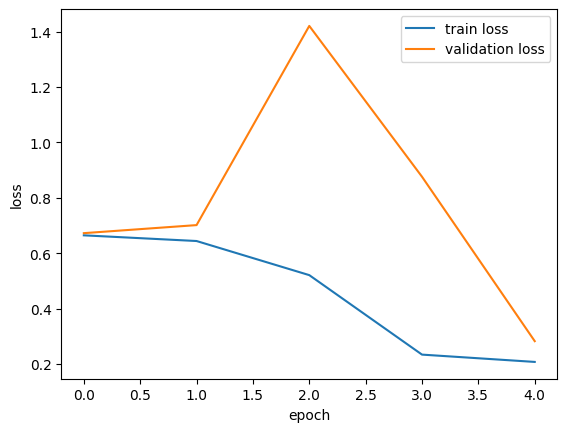

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss','validation loss'])
plt.ylabel("loss")
plt.xlabel("epoch")
plt.show()

#train dataset lai ni prefetch bhayek aaeu chai garni


In [ ]:
test_dataset=test_dataset.batch(32)

#lets predict for one value

indexing kasto kasto hudo raixa image na pugnu jel samman heram paila

In [ ]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

#shape=(None, 224, 224, 3)

tyo aagadi ko none batching gare paxi aauxa

In [ ]:
for element in test_dataset.take(1):
  print(type(element))
  images=element[0]

<class 'tuple'>


In [ ]:
type(images)

tensorflow.python.framework.ops.EagerTensor

In [ ]:
images.shape

TensorShape([32, 224, 224, 3])

here 32,224,224,3

hamlae batching garya vaye ra yesto vako
batching na gare ko dataset .take(1)
garyo vanae ta yeuta image matrai aauxa
as hamlae batching garya xau so .take(1) garda first ko batch chai aauxa

so tyo batch bata ni first ko select garnu paryo

In [ ]:
single_img=images[0]

In [ ]:
single_img.shape

TensorShape([224, 224, 3])

In [ ]:
single_img

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)>

In [ ]:
#note hamro input layer lae none,224,224,3 none= simply batch size
#wala shape linxa tara hamle single image dini ho vanae  224,224,3
#matra hunxa so valid hunna
#so dina chai first batch nai dini
#aani first batch ko predicttion herni
#tesko first result vanae ko 1st image ko lagi prediction hunxa


In [ ]:
values=model.predict(train_dataset.take(1))
values

1/1 [==============================] - 0s 367ms/step


array([[8.1292558e-01],
       [3.4702488e-03],
       [3.0702660e-03],
       [3.4268230e-04],
       [6.1266118e-01],
       [8.8696164e-01],
       [8.8104254e-01],
       [8.7806571e-01],
       [6.3187003e-01],
       [9.5792804e-03],
       [1.2563464e-03],
       [8.4461498e-01],
       [9.1800803e-01],
       [5.8591992e-01],
       [6.7079395e-02],
       [9.0097910e-01],
       [8.5281783e-01],
       [1.4022413e-03],
       [8.6924213e-01],
       [4.7399420e-03],
       [8.1736612e-01],
       [9.2161036e-01],
       [3.0143157e-02],
       [3.1898722e-02],
       [1.0514952e-03],
       [7.5698522e-04],
       [9.5566094e-04],
       [1.0969790e-02],
       [3.2104639e-04],
       [5.5411778e-04],
       [8.4254372e-01],
       [8.2043153e-01]], dtype=float32)

In [ ]:
type(values)

numpy.ndarray

In [ ]:
#so lets grab the first element
first_prediction=values[0,0]

In [ ]:
first_prediction

0.8129256

In [ ]:
def result_show(k):
  if k<0.5:
    print("you are not malerized")
  else:
    print("you got maleria")


In [ ]:
result_show(first_prediction)

you got maleria


#yedi single imagepathauni ho vanae shape
(1,224,224,3)
where none/batch=1

yesari dinu parxa
224,224,3 matrai diyae ra hunna


In [ ]:
single_image_batch = np.expand_dims(single_img, axis=0)
single_image_batch.shape

(1, 224, 224, 3)

In [ ]:
model.predict(single_image_batch)

1/1 [==============================] - 0s 130ms/step


array([[0.09309733]], dtype=float32)

tyo aagadi none,224,224,3

vannu ko matlab aagadi batch size jati sukai ko deu kunai fixed no xaina
tara last ko 3 oota chai tyakkai milnu parxa
